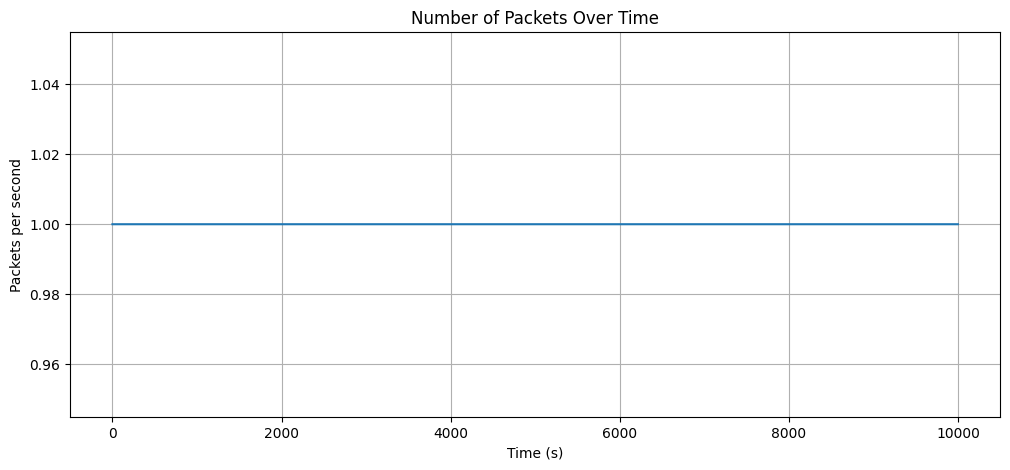

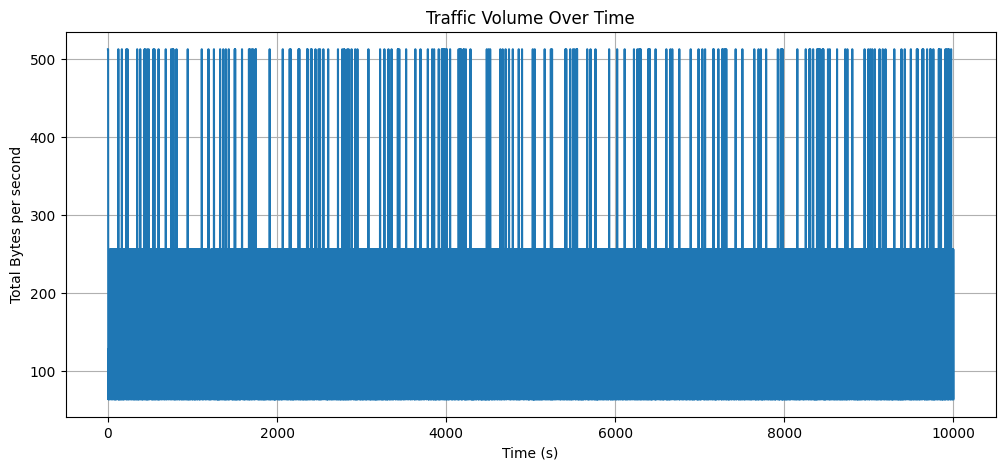

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("./urllc_markov_fixed.csv")

# Convert 'Time' to numeric seconds
df['Time'] = pd.to_numeric(df['Time'])

# ---- Packets per second ----
packets_per_sec = df.groupby(df['Time'].astype(int)).size()

plt.figure(figsize=(12,5))
packets_per_sec.plot()
plt.xlabel("Time (s)")
plt.ylabel("Packets per second")
plt.title("Number of Packets Over Time")
plt.grid(True)
plt.show()

# ---- Bytes per second ----
bytes_per_sec = df.groupby(df['Time'].astype(int))['Length'].sum()

plt.figure(figsize=(12,5))
bytes_per_sec.plot()
plt.xlabel("Time (s)")
plt.ylabel("Total Bytes per second")
plt.title("Traffic Volume Over Time")
plt.grid(True)
plt.show()


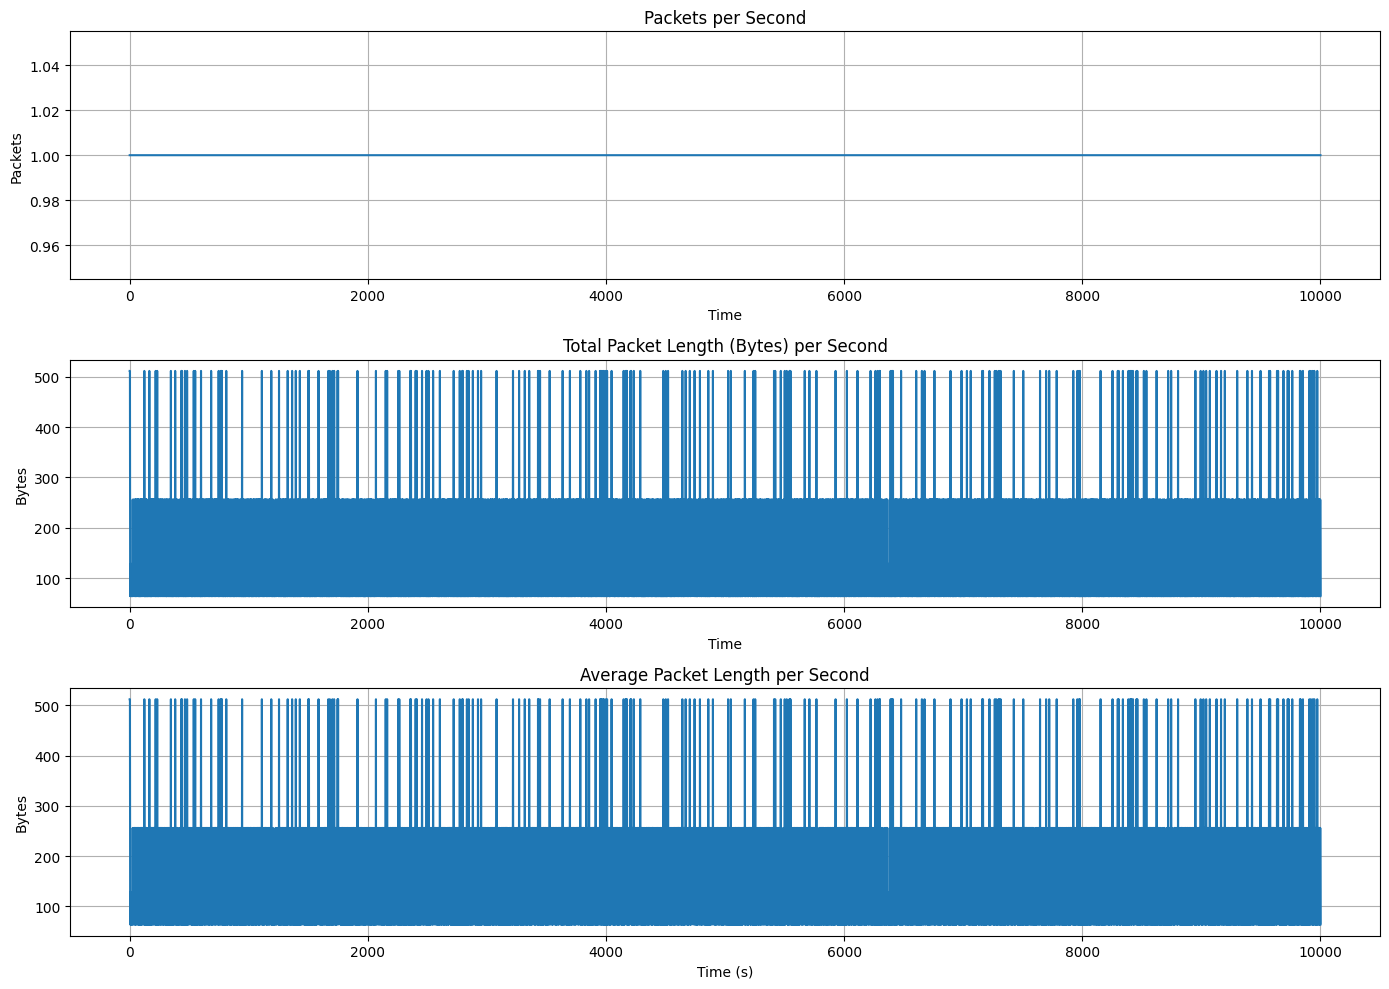

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("./urllc_markov_fixed.csv")

# Ensure time is numeric (seconds)
df['Time'] = pd.to_numeric(df['Time'])

# --- Packets per second ---
packets_per_sec = df.groupby(df['Time'].astype(int)).size()

# --- Bytes (packet length) per second ---
bytes_per_sec = df.groupby(df['Time'].astype(int))['Length'].sum()

# --- Plotting ---
plt.figure(figsize=(14, 10))

# 1. Packets per second
plt.subplot(3, 1, 1)
packets_per_sec.plot()
plt.ylabel("Packets")
plt.title("Packets per Second")
plt.grid(True)

# 2. Bytes per second
plt.subplot(3, 1, 2)
bytes_per_sec.plot()
plt.ylabel("Bytes")
plt.title("Total Packet Length (Bytes) per Second")
plt.grid(True)

# 3. Average packet length per second (optional, can be interesting)
avg_packet_length = df.groupby(df['Time'].astype(int))['Length'].mean()
plt.subplot(3, 1, 3)
avg_packet_length.plot()
plt.ylabel("Bytes")
plt.title("Average Packet Length per Second")
plt.grid(True)

plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()


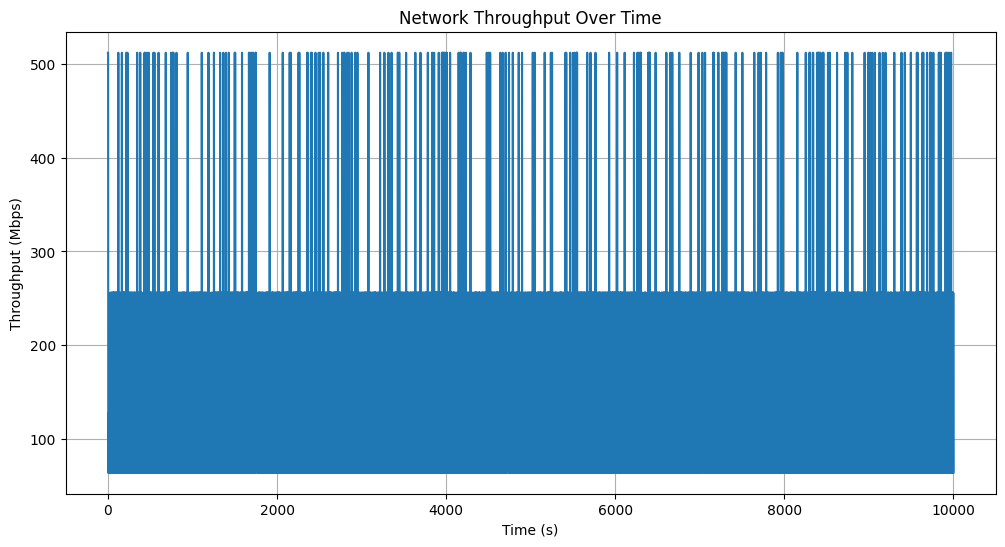

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("./urllc_markov_fixed.csv")

# Convert 'Time' to integer seconds
df['Time'] = pd.to_numeric(df['Time'])
df['second'] = df['Time'].astype(int)

# Throughput = sum of packet lengths per second
throughput = df.groupby('second')['Length'].sum()
throughput_bps = throughput * 8  # Convert to bits per second if needed
throughput_mbps = throughput * 8 / 1e6  # Convert to Mbps if needed

# Plot
plt.figure(figsize=(12, 6))
throughput.plot()
plt.xlabel("Time (s)")
plt.ylabel("Throughput (Mbps)")
plt.title("Network Throughput Over Time")
plt.grid(True)
plt.show()


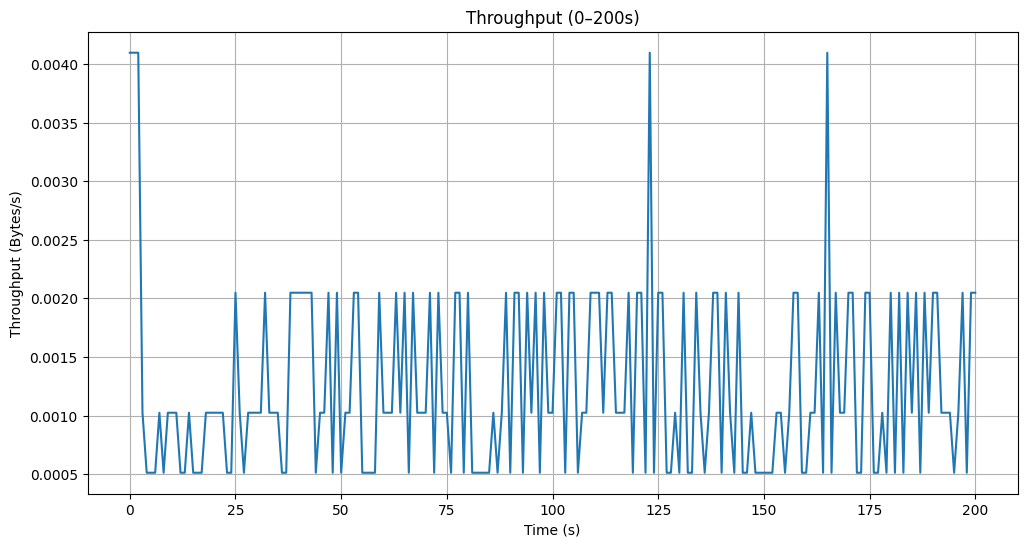

In [8]:
# ---- Select a smaller window, e.g. 0–200 seconds ----
subset = throughput_mbps.loc[0:200]

# Plot
plt.figure(figsize=(12,6))
subset.plot()
plt.xlabel("Time (s)")
plt.ylabel("Throughput (Bytes/s)")
plt.title("Throughput (0–200s)")
plt.grid(True)
plt.show()

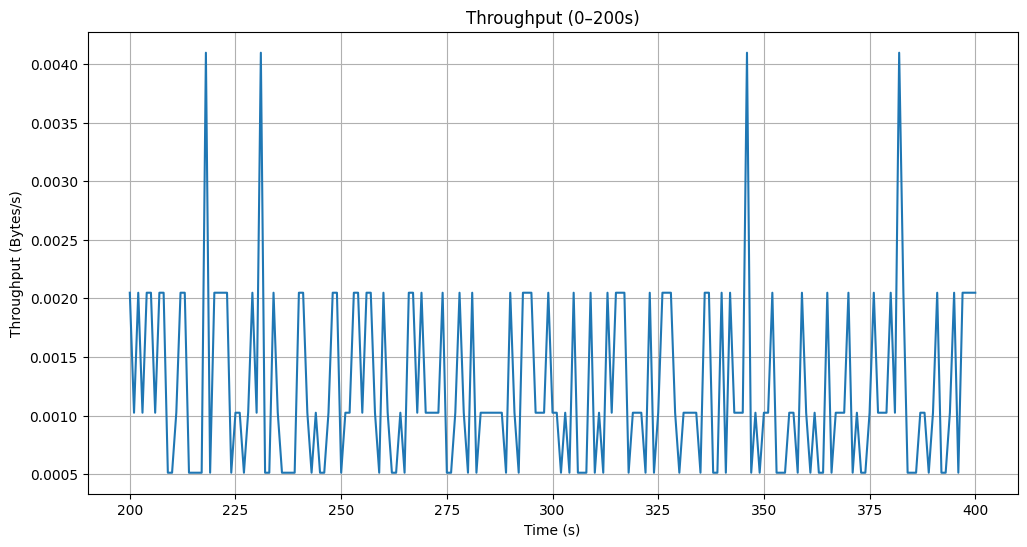

In [9]:
# ---- Select a smaller window, e.g. 0–200 seconds ----
subset = throughput_mbps.loc[200:400]

# Plot
plt.figure(figsize=(12,6))
subset.plot()
plt.xlabel("Time (s)")
plt.ylabel("Throughput (Bytes/s)")
plt.title("Throughput (0–200s)")
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# Load CSV
df = pd.read_csv("./urllc_markov_fixed.csv")
df['Time'] = pd.to_numeric(df['Time'])
df['second'] = df['Time'].astype(int)

# Throughput per second
throughput = df.groupby('second')['Length'].sum()
throughput_bps = throughput * 8  # Convert to bits per second if needed
throughput_mbps = throughput * 8 / 1e6  # Convert to Mbps if needed

# Function to plot any window
def plot_window(start=0, window=200):
    subset = throughput_mbps.loc[start:start+window]
    plt.figure(figsize=(12,6))
    subset.plot()
    plt.xlabel("Time (s)")
    plt.ylabel("Throughput (Mbps)")
    plt.title(f"Throughput from {start} to {start+window} seconds")
    plt.grid(True)
    plt.show()

# Interactive widget
interact(
    plot_window,
    start=IntSlider(min=0, max=int(throughput_mbps.index.max())-200, step=50, value=0),
    window=IntSlider(min=50, max=1000, step=50, value=200)
)


In [ ]:
from ipywidgets import interactive_output, IntSlider, VBox
import matplotlib.pyplot as plt
import pandas as pd


# Load CSV
df = pd.read_csv("./urllc_markov_fixed.csv")
df['Time'] = pd.to_numeric(df['Time'])
df['second'] = df['Time'].astype(int)

# Throughput per second
throughput = df.groupby('second')['Length'].sum()
throughput_bps = throughput * 8  # Convert to bits per second if needed
throughput_mbps = throughput * 8 / 1e6  # Convert to Mbps if needed

def plot_window(start=0, window=200):
    subset = throughput.loc[start:start+window]
    plt.figure(figsize=(12,6))
    subset.plot()
    plt.xlabel("Time (s)")
    plt.ylabel("Throughput (Bytes/s)")
    plt.title(f"Throughput from {start} to {start+window} seconds")
    plt.grid(True)
    plt.show()

start_slider = IntSlider(min=0, max=int(throughput.index.max())-200, step=50, value=0)
window_slider = IntSlider(min=50, max=1000, step=50, value=200)

out = interactive_output(plot_window, {'start': start_slider, 'window': window_slider})

VBox([start_slider, window_slider, out])


# Prediction

## Tensorflow

In [4]:
# --- 1. Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# --- 2. Load Data ---
df = pd.read_csv("./urllc_markov_fixed.csv")
print(df.head())

2025-09-25 10:23:42.185363: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-25 10:23:42.210400: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI AVX_VNNI_INT8 AVX_NE_CONVERT FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-25 10:23:42.794614: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


          App name  No.    Time      Source   Destination Protocol  Length
0  URLLC_Synthetic    1  0.0000  172.30.1.1  172.30.1.250      TCP     512
1  URLLC_Synthetic    2  1.0001  172.30.1.1  172.30.1.250      TCP     512
2  URLLC_Synthetic    3  2.0002  172.30.1.1  172.30.1.250      TCP     512
3  URLLC_Synthetic    4  3.0003  172.30.1.1  172.30.1.250      TCP     128
4  URLLC_Synthetic    5  4.0004  172.30.1.1  172.30.1.250     QUIC      64


### Regularized Time Approach
We resample to a fixed grid (e.g., every 1ms).

In [5]:
# Convert Time (ms) to timedelta for resampling
df['Time'] = pd.to_timedelta(df['Time'], unit='ms')

# Resample every 1ms
df_reg = df.set_index("Time").resample("1ms").mean(numeric_only=True)

# Interpolate missing values
df_reg['Length'] = df_reg['Length'].interpolate()

# Scale
scaler_reg = MinMaxScaler()
series_reg = scaler_reg.fit_transform(df_reg[['Length']].values)

# Create dataset function
def create_dataset(series, window=20):
    X, y = [], []
    for i in range(len(series)-window):
        X.append(series[i:i+window])
        y.append(series[i+window])
    return np.array(X), np.array(y)

X_reg, y_reg = create_dataset(series_reg, window=20)
X_reg = X_reg.reshape((X_reg.shape[0], X_reg.shape[1], 1))

print("Regularized shape:", X_reg.shape, y_reg.shape)

Regularized shape: (9981, 20, 1) (9981, 1)


#### Train LSTM (Regularized)

In [6]:
model_reg = Sequential([
    LSTM(64, activation='tanh', input_shape=(X_reg.shape[1], 1)),
    Dense(1)
])
model_reg.compile(optimizer='adam', loss='mse')
history_reg = model_reg.fit(X_reg, y_reg, epochs=10, batch_size=32, validation_split=0.2)

# Predictions
yhat_reg = model_reg.predict(X_reg)
yhat_reg = scaler_reg.inverse_transform(yhat_reg)
y_true_reg = scaler_reg.inverse_transform(y_reg.reshape(-1,1))

# Plot
plt.figure(figsize=(12,5))
plt.plot(y_true_reg[:500], label="True")
plt.plot(yhat_reg[:500], label="Predicted")
plt.title("Regularized (1ms Resample)")
plt.legend()
plt.show()


W0000 00:00:1758810250.935704 3666758 gpu_device.cc:2431] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
W0000 00:00:1758810250.942145 3666758 gpu_device.cc:2431] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
I0000 00:00:1758810251.030433 3666758 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11430 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 5080, pci bus id: 0000:01:00.0, compute capability: 12.0
2025-09-25 10:24:11.190875: W tensorflow/compiler/mlir/tools/kernel_gen/tf_gpu_runtime_wrappers.cc:40] 'cuModuleLoadData(&module, data)' failed with 'CUDA_ERROR_INVALID_PTX'

2025-09-25 10:24:11.190899: W tensorflow/compiler/mlir/tools/kernel_gen/tf_gpu_runtime_wrappers.cc:40] 'cuModuleGetFunctio

InternalError: {{function_node __wrapped__Cast_device_/job:localhost/replica:0/task:0/device:GPU:0}} 'cuLaunchKernel(function, gridX, gridY, gridZ, blockX, blockY, blockZ, 0, reinterpret_cast<CUstream>(stream), params, nullptr)' failed with 'CUDA_ERROR_INVALID_HANDLE' [Op:Cast] name: 

### Irregular Time Approach
We use Δt (ms between packets) + Length as features.

In [ ]:
# Reload raw CSV for irregular case
df = pd.read_csv("./urllc_markov_fixed.csv")

# Compute inter-arrival time in ms
df['delta_t'] = df['Time'].diff().fillna(0)

# Features: [Δt, Length]
series_irreg = df[['delta_t', 'Length']].values

# Scale
scaler_irreg = MinMaxScaler()
series_irreg = scaler_irreg.fit_transform(series_irreg)

# Dataset creation
def create_dataset_multi(series, window=20):
    X, y = [], []
    for i in range(len(series)-window):
        X.append(series[i:i+window])
        y.append(series[i+window, 1])  # predict Length (2nd column)
    return np.array(X), np.array(y)

X_irreg, y_irreg = create_dataset_multi(series_irreg, window=20)

print("Irregular shape:", X_irreg.shape, y_irreg.shape)


In [ ]:
model_irreg = Sequential([
    LSTM(64, activation='tanh', input_shape=(X_irreg.shape[1], X_irreg.shape[2])),
    Dense(1)
])
model_irreg.compile(optimizer='adam', loss='mse')
history_irreg = model_irreg.fit(X_irreg, y_irreg, epochs=10, batch_size=32, validation_split=0.2)

# Predictions
yhat_irreg = model_irreg.predict(X_irreg)

# Inverse scale (only for Length column)
yhat_irreg_full = np.zeros((len(yhat_irreg), 2))
yhat_irreg_full[:,1] = yhat_irreg[:,0]
yhat_irreg = scaler_irreg.inverse_transform(yhat_irreg_full)[:,1]

y_true_irreg_full = np.zeros((len(y_irreg), 2))
y_true_irreg_full[:,1] = y_irreg
y_true_irreg = scaler_irreg.inverse_transform(y_true_irreg_full)[:,1]

# Plot
plt.figure(figsize=(12,5))
plt.plot(y_true_irreg[:500], label="True")
plt.plot(yhat_irreg[:500], label="Predicted")
plt.title("Irregular (Δt + Length as input)")
plt.legend()
plt.show()


## Pytorch

In [1]:
# --- 1. Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [2]:
def create_dataset(series, window=20, target_col=0):
    X, y = [], []
    for i in range(len(series)-window):
        X.append(series[i:i+window])
        y.append(series[i+window, target_col])  
    return np.array(X), np.array(y)


#### Regularized Time Approach

In [3]:
# Load data
#df = pd.read_csv("./urllc_markov_fixed.csv")
df = pd.read_csv("./mMTC_M5_aligned_trace.csv")

# Convert ms to timedelta and resample every 1ms
df['Time'] = pd.to_timedelta(df['Time'], unit='ms')
df_reg = df.set_index("Time").resample("1ms").mean(numeric_only=True)
df_reg['Length'] = df_reg['Length'].interpolate()

# Scale
scaler_reg = MinMaxScaler()
series_reg = scaler_reg.fit_transform(df_reg[['Length']].values)

# Dataset
X_reg, y_reg = create_dataset(series_reg, window=20, target_col=0)
#X_reg = torch.tensor(X_reg, dtype=torch.float32).unsqueeze(-1)  # [samples, window, 1]
X_reg = torch.tensor(X_reg, dtype=torch.float32)  # (samples, timesteps, 1)

y_reg = torch.tensor(y_reg, dtype=torch.float32).unsqueeze(-1)  # [samples, 1]



train_loader_reg = DataLoader(TensorDataset(X_reg, y_reg), batch_size=32, shuffle=True)


In [4]:
print("Regularized shape:", X_reg.shape, y_reg.shape)
#print("Irregular shape:", X_irreg.shape, y_irreg.shape)

Regularized shape: torch.Size([9905, 20, 1]) torch.Size([9905, 1])


In [5]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_layers=1):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # last timestep
        return out


In [6]:
def train_model(model, loader, epochs=10, lr=1e-3):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    losses = []
    for epoch in range(epochs):
        epoch_loss = 0
        for Xb, yb in loader:
            pred = model(Xb)
            loss = criterion(pred, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        losses.append(epoch_loss/len(loader))
        print(f"Epoch {epoch+1}/{epochs}, Loss={losses[-1]:.6f}")
    return losses


Epoch 1/50, Loss=0.010434
Epoch 2/50, Loss=0.004256
Epoch 3/50, Loss=0.004059
Epoch 4/50, Loss=0.003917
Epoch 5/50, Loss=0.003752
Epoch 6/50, Loss=0.003590
Epoch 7/50, Loss=0.003450
Epoch 8/50, Loss=0.003359
Epoch 9/50, Loss=0.003340
Epoch 10/50, Loss=0.003313
Epoch 11/50, Loss=0.003227
Epoch 12/50, Loss=0.003233
Epoch 13/50, Loss=0.003194
Epoch 14/50, Loss=0.003168
Epoch 15/50, Loss=0.003136
Epoch 16/50, Loss=0.003138
Epoch 17/50, Loss=0.003113
Epoch 18/50, Loss=0.003088
Epoch 19/50, Loss=0.003105
Epoch 20/50, Loss=0.003037
Epoch 21/50, Loss=0.003031
Epoch 22/50, Loss=0.003054
Epoch 23/50, Loss=0.003023
Epoch 24/50, Loss=0.003003
Epoch 25/50, Loss=0.002986
Epoch 26/50, Loss=0.003008
Epoch 27/50, Loss=0.003013
Epoch 28/50, Loss=0.002998
Epoch 29/50, Loss=0.002974
Epoch 30/50, Loss=0.002966
Epoch 31/50, Loss=0.002972
Epoch 32/50, Loss=0.002955
Epoch 33/50, Loss=0.002960
Epoch 34/50, Loss=0.002931
Epoch 35/50, Loss=0.002928
Epoch 36/50, Loss=0.002985
Epoch 37/50, Loss=0.002919
Epoch 38/5

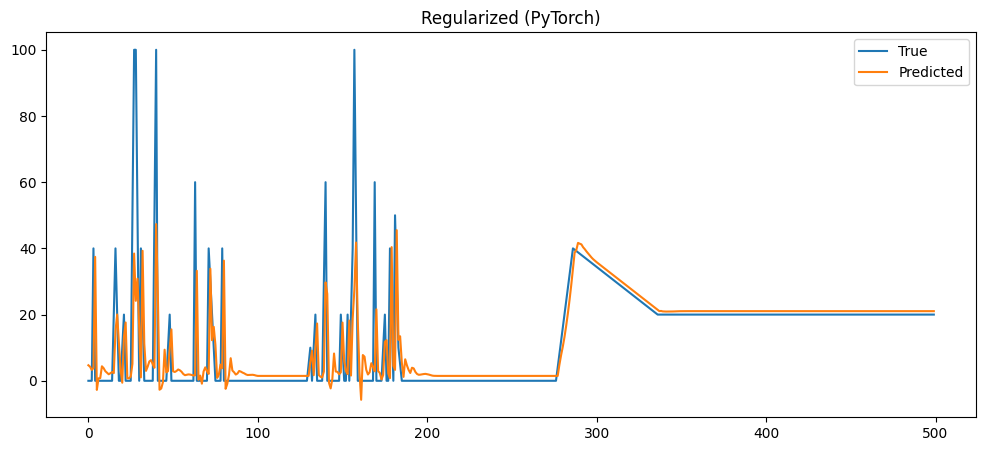

In [7]:
model_reg = LSTMModel(input_dim=1)
losses_reg = train_model(model_reg, train_loader_reg, epochs=50)

# Predictions
with torch.no_grad():
    yhat_reg = model_reg(X_reg).numpy()

yhat_reg = scaler_reg.inverse_transform(yhat_reg)
y_true_reg = scaler_reg.inverse_transform(y_reg.numpy())

plt.figure(figsize=(12,5))
plt.plot(y_true_reg[:500], label="True")
plt.plot(yhat_reg[:500], label="Predicted")
plt.title("Regularized (PyTorch)")
plt.legend()
plt.show()


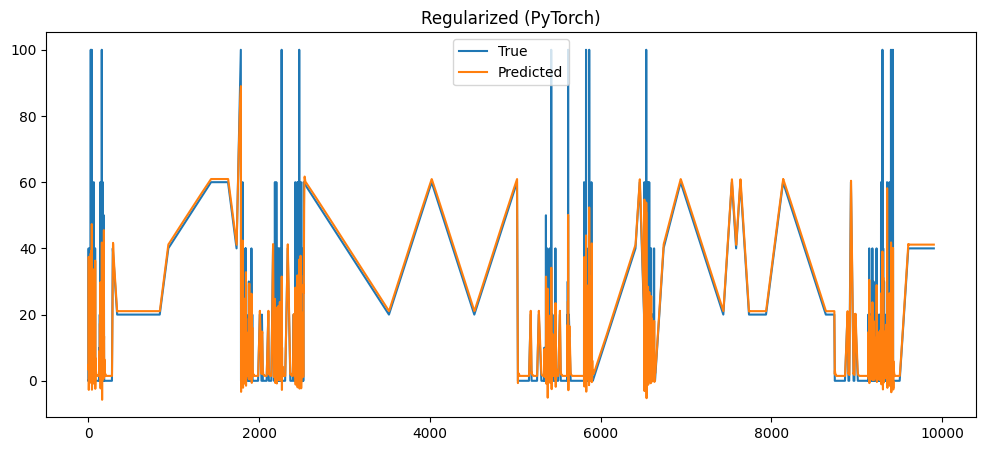

In [8]:
plt.figure(figsize=(12,5))
plt.plot(y_true_reg, label="True")
plt.plot(yhat_reg, label="Predicted")
plt.title("Regularized (PyTorch)")
plt.legend()
plt.show()

#### Irregular Time Approach

In [9]:
# Reload raw
#df = pd.read_csv("./urllc_markov_fixed.csv")
df = pd.read_csv("./mMTC_M5_aligned_trace.csv")
df['delta_t'] = df['Time'].diff().fillna(0)

# Features: Δt + Length
series_irreg = df[['delta_t','Length']].values

# Scale
scaler_irreg = MinMaxScaler()
series_irreg = scaler_irreg.fit_transform(series_irreg)

# Dataset
X_irreg, y_irreg = create_dataset(series_irreg, window=20, target_col=1)
X_irreg = torch.tensor(X_irreg, dtype=torch.float32)          # [samples, window, 2]
y_irreg = torch.tensor(y_irreg, dtype=torch.float32).unsqueeze(-1)

train_loader_irreg = DataLoader(TensorDataset(X_irreg, y_irreg), batch_size=32, shuffle=True)

In [10]:
print("Irregular shape:", X_irreg.shape, y_irreg.shape)

Irregular shape: torch.Size([1129, 20, 2]) torch.Size([1129, 1])


Epoch 1/50, Loss=0.033951
Epoch 2/50, Loss=0.033747
Epoch 3/50, Loss=0.033765
Epoch 4/50, Loss=0.032862
Epoch 5/50, Loss=0.032887
Epoch 6/50, Loss=0.032628
Epoch 7/50, Loss=0.032638
Epoch 8/50, Loss=0.033757
Epoch 9/50, Loss=0.032354
Epoch 10/50, Loss=0.033746
Epoch 11/50, Loss=0.032174
Epoch 12/50, Loss=0.032576
Epoch 13/50, Loss=0.034243
Epoch 14/50, Loss=0.034087
Epoch 15/50, Loss=0.032702
Epoch 16/50, Loss=0.032405
Epoch 17/50, Loss=0.033783
Epoch 18/50, Loss=0.032536
Epoch 19/50, Loss=0.032071
Epoch 20/50, Loss=0.034353
Epoch 21/50, Loss=0.032319
Epoch 22/50, Loss=0.032298
Epoch 23/50, Loss=0.032518
Epoch 24/50, Loss=0.031855
Epoch 25/50, Loss=0.031854
Epoch 26/50, Loss=0.032064
Epoch 27/50, Loss=0.032500
Epoch 28/50, Loss=0.031788
Epoch 29/50, Loss=0.032042
Epoch 30/50, Loss=0.031833
Epoch 31/50, Loss=0.032460
Epoch 32/50, Loss=0.032244
Epoch 33/50, Loss=0.032094
Epoch 34/50, Loss=0.032269
Epoch 35/50, Loss=0.031713
Epoch 36/50, Loss=0.032555
Epoch 37/50, Loss=0.032279
Epoch 38/5

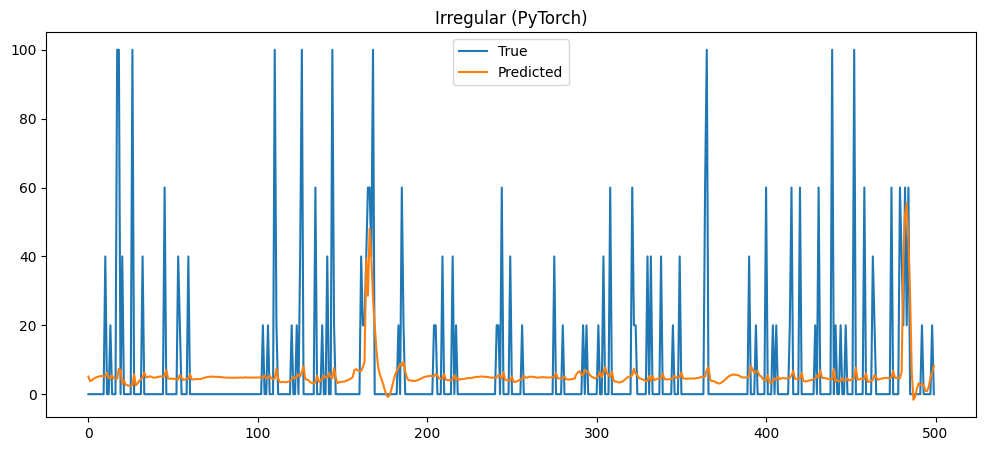

In [11]:
model_irreg = LSTMModel(input_dim=2)
losses_irreg = train_model(model_irreg, train_loader_irreg, epochs=50)

# Predictions
with torch.no_grad():
    yhat_irreg = model_irreg(X_irreg).numpy()

# Inverse scale
yhat_irreg_full = np.zeros((len(yhat_irreg), 2))
yhat_irreg_full[:,1] = yhat_irreg[:,0]
yhat_irreg = scaler_irreg.inverse_transform(yhat_irreg_full)[:,1]

y_true_irreg_full = np.zeros((len(y_irreg), 2))
y_true_irreg_full[:,1] = y_irreg.numpy().flatten()
y_true_irreg = scaler_irreg.inverse_transform(y_true_irreg_full)[:,1]

plt.figure(figsize=(12,5))
plt.plot(y_true_irreg[:500], label="True")
plt.plot(yhat_irreg[:500], label="Predicted")
plt.title("Irregular (PyTorch)")
plt.legend()
plt.show()
